#**DIABETES PREDICTION USING MACHINE LEARNING**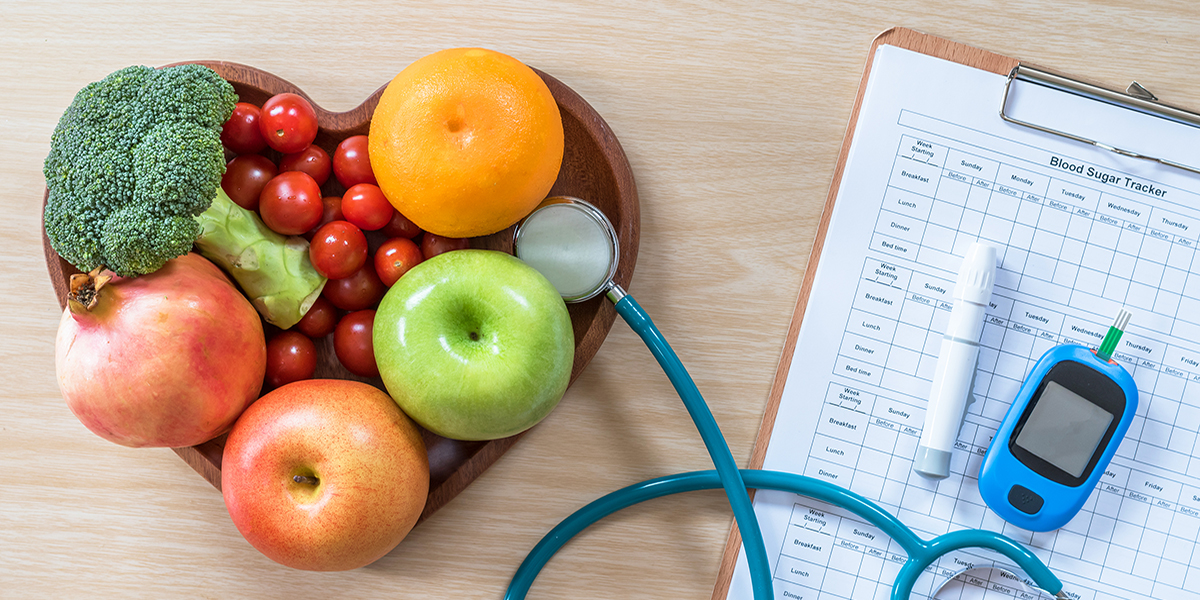

*This project is to develop a model that can
perform the prediction of diabetes of a
patient. Here, we using each classification
algorithms(KNN, SVC, Naive Bayes,
Decision Tree ,Random Forest,
AdaBoost,XGBoost) to the categorical
dataset and build a model having high
accuracy and deployed it. According to
the given new data machine will predict
whether the person have Diabetes or not.*

*Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood glucose.*

**IMPORT NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DataSets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
#Getting the numerical columns
num_col=df.columns.to_list()
print(num_col)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


**DATA VISUALIZATION**

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

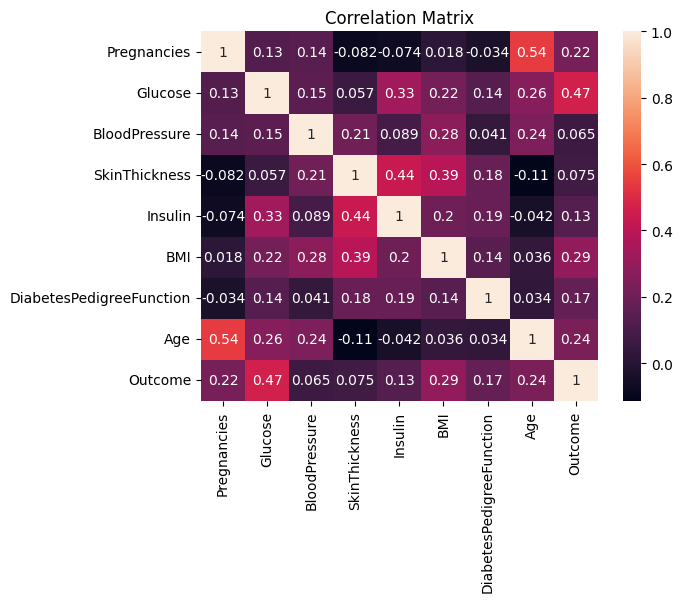

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

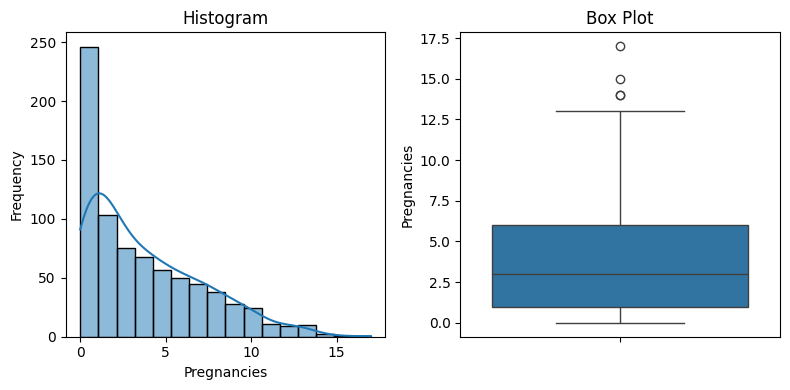

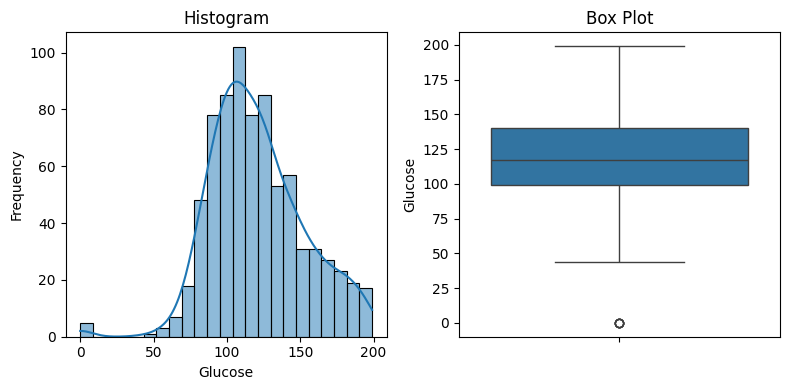

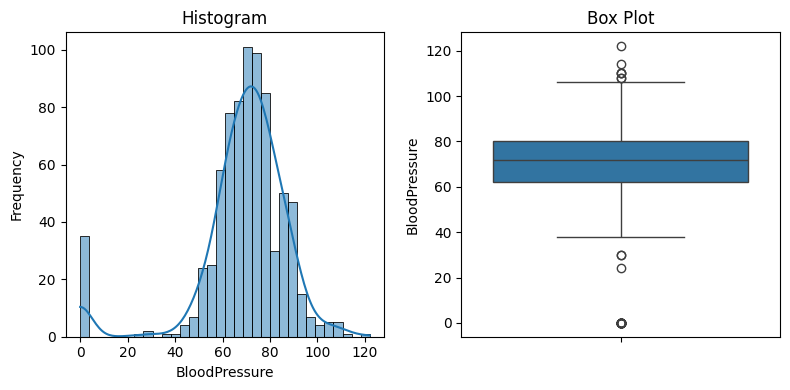

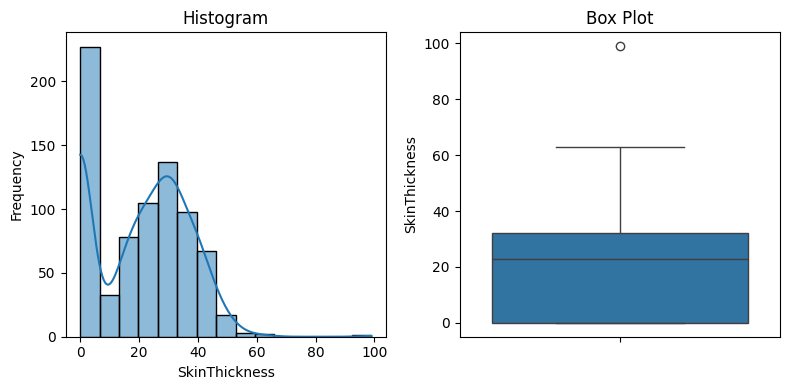

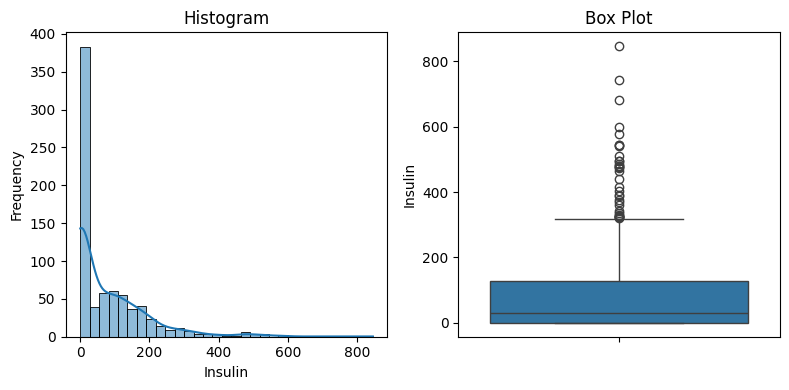

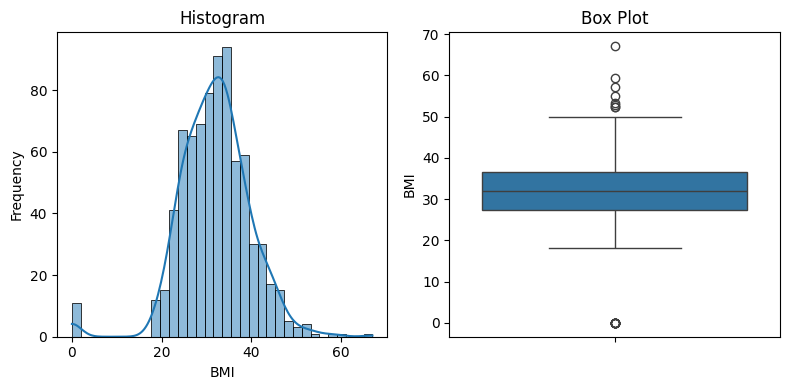

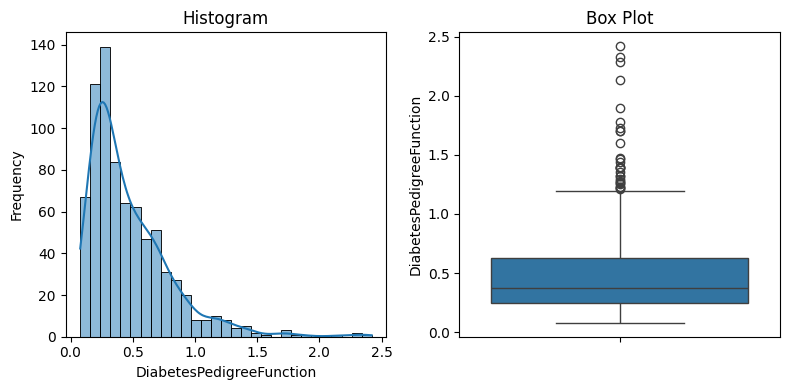

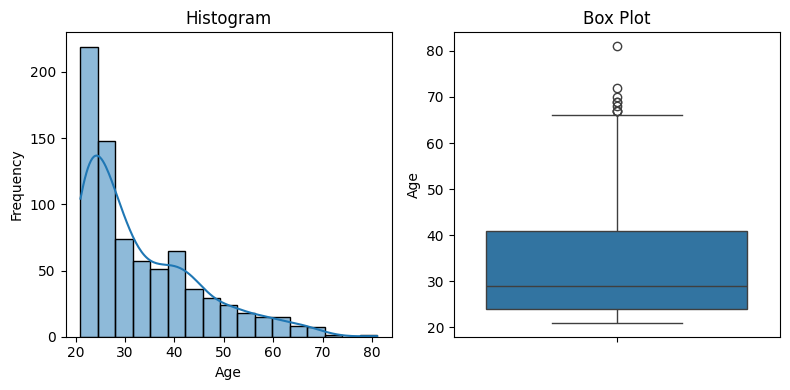

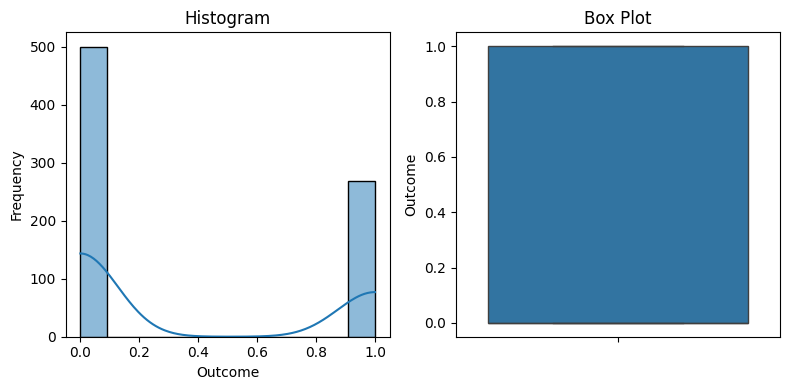

In [ ]:
for variable in num_col:

    plt.figure(figsize=(8, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=variable, kde=True)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Histogram")

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=variable)
    plt.ylabel(variable)
    plt.title("Box Plot")

    # Adjust spacing between subplots
    plt.tight_layout()

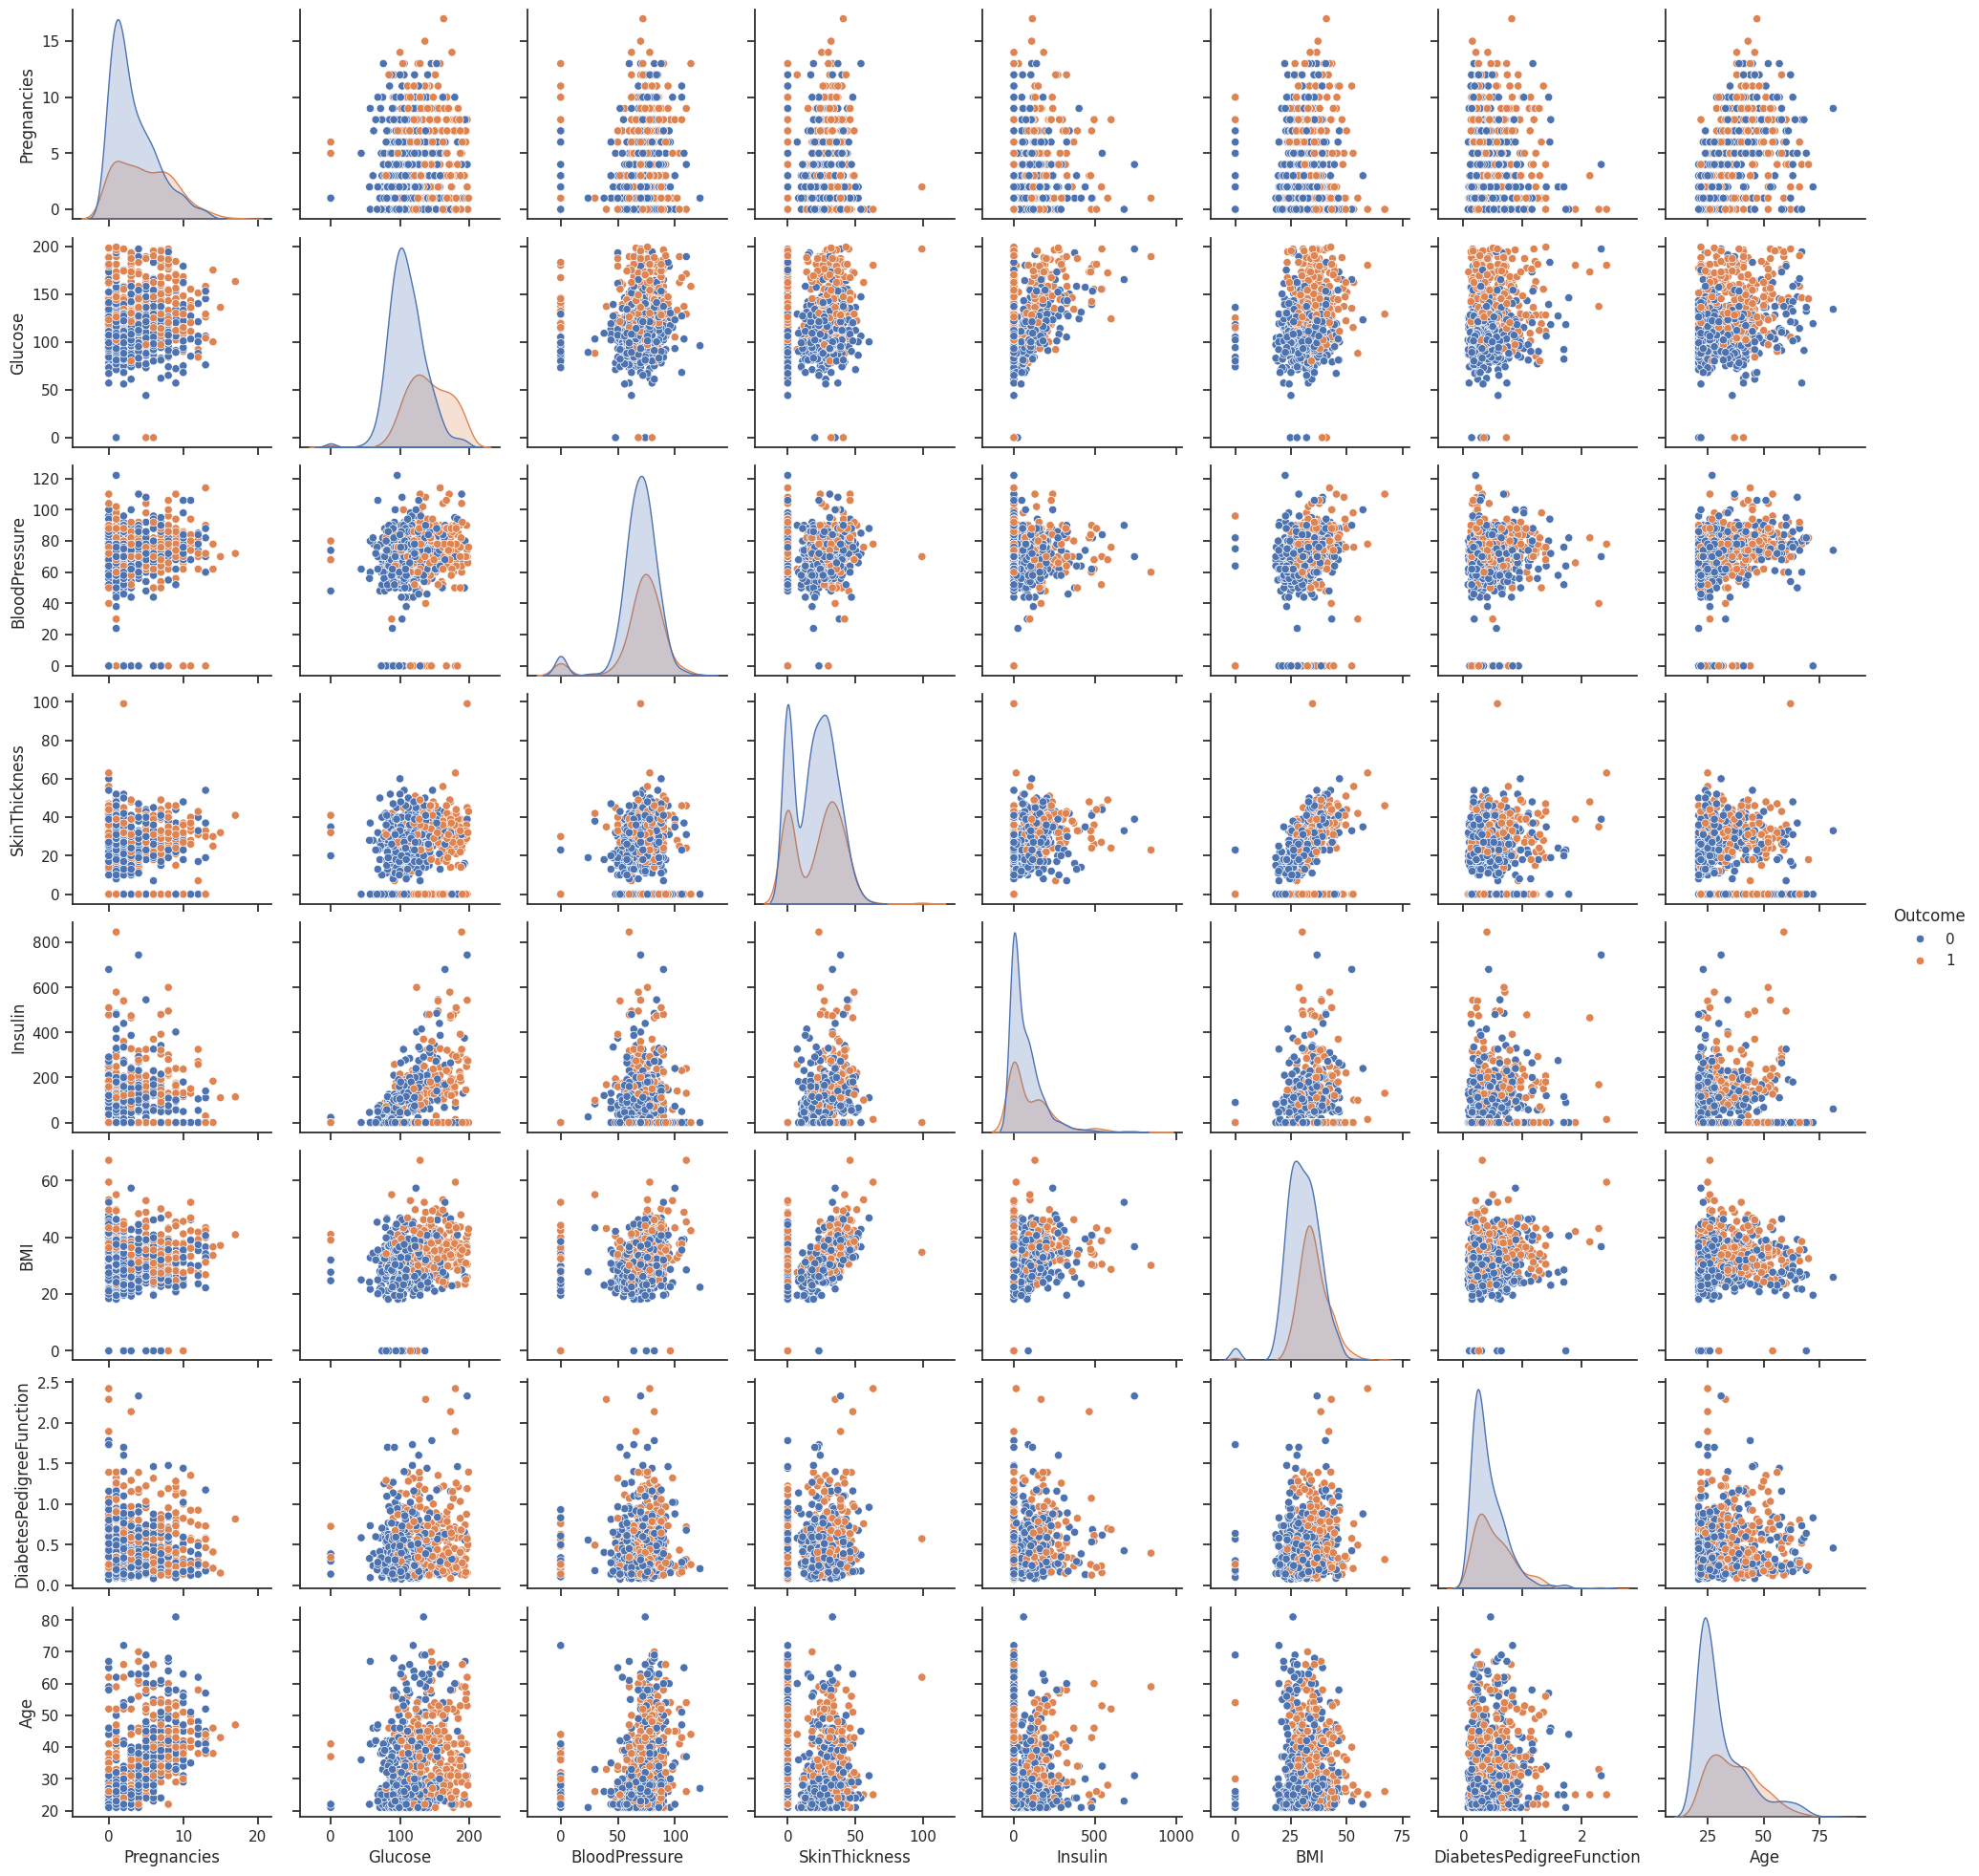

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

<Axes: xlabel='count', ylabel='Outcome'>

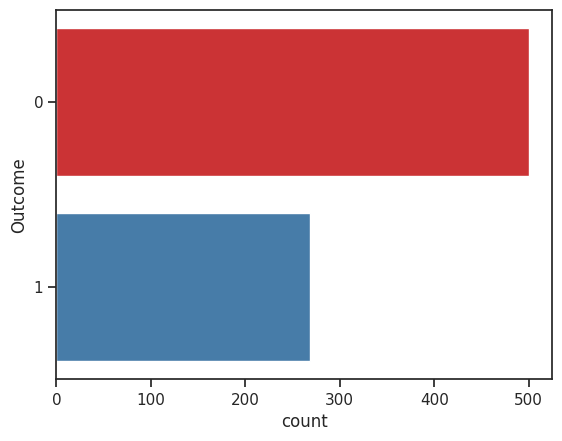

In [ ]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

**SEPERATE INPUTS AND OUTPUT**

In [ ]:
X=df.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

From this, we can understand this is a imbalanced dataset.

To covert imbalaced dataset to balanced dataset we perform oversampling.

**OVERSAMPLING**

In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
X_os

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.600000,0.627000,50
1,1,85,66,29,0,26.600000,0.351000,31
2,8,183,64,0,0,23.300000,0.672000,32
3,1,89,66,23,94,28.100000,0.167000,21
4,0,137,40,35,168,43.100000,2.288000,33
...,...,...,...,...,...,...,...,...
995,6,160,55,30,175,30.110579,0.587917,39
996,3,109,83,30,0,34.219469,0.992558,40
997,12,133,69,37,114,37.527830,0.240400,43
998,11,149,104,0,0,37.913012,0.474978,44


In [ ]:
y_os

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [ ]:
y_os.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

**SCALING**

In [ ]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_os)
X_new

array([[ 0.57575696,  0.69675038,  0.11861079, ...,  0.13497406,
         0.42529553,  1.35214236],
       [-0.90433806, -1.20224482, -0.19161795, ..., -0.796393  ,
        -0.42646718, -0.28514684],
       [ 1.16779497,  1.75174771, -0.29502753, ..., -1.23546605,
         0.56416989, -0.19897372],
       ...,
       [ 2.35187099,  0.24460867, -0.03650358, ...,  0.65758147,
        -0.7677906 ,  0.74893055],
       [ 2.05585199,  0.72689316,  1.77316407, ...,  0.70883084,
        -0.04385765,  0.83510366],
       [-0.60831905,  0.36517979, -0.55355148, ..., -0.77081945,
        -0.11298622, -1.06070488]])

**TRAIN TEST SPLIT**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_os,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,y_train.shape

((700, 8), (700,))

In [ ]:
X_test.shape,y_test.shape

((300, 8), (300,))

**MODEL BUILDING**

In [ ]:
kn=KNeighborsClassifier()
sv=SVC()
nbs=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
xg=XGBClassifier()
lr=LogisticRegression()
models=[kn,sv,nbs,dt,ad,xg,lr]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       158
           1       0.70      0.85      0.77       142

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300

SVC()
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       158
           1       0.72      0.85      0.78       142

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300

GaussianNB()
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       158
           1       0.69      0.70      0.70       142

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.7

In [ ]:
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_sv=sv.predict(X_test)
y_pred_sv

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

**PERFORMANCE MEASURES**

Accuracy_score : 77.0
ConfusionMatrixDisplay : <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7faedfc70550>
Classification report :               precision    recall  f1-score   support

           0       0.83      0.70      0.76       158
           1       0.72      0.85      0.78       142

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



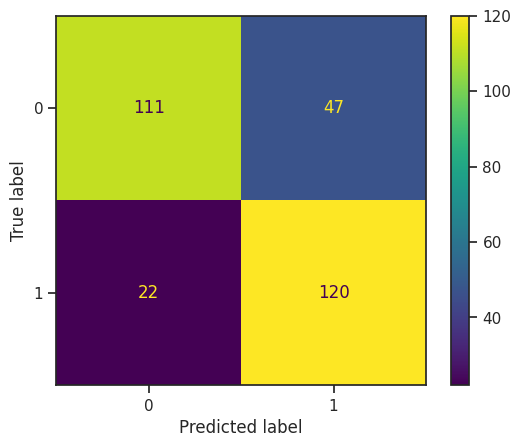

In [ ]:
print("Accuracy_score :",accuracy_score(y_test,y_pred_sv)*100)
print("ConfusionMatrixDisplay :",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))
print("Classification report :",classification_report(y_test,y_pred_sv))

In [ ]:
print("Precision Score :",precision_score(y_test,y_pred_sv))
print("Recall Score :",recall_score(y_test,y_pred_sv))
print("F1 Score :",f1_score(y_test,y_pred_sv))
print("ROC AUC Score :",roc_auc_score(y_test,y_pred_sv))

Precision Score : 0.718562874251497
Recall Score : 0.8450704225352113
F1 Score : 0.7766990291262135
ROC AUC Score : 0.7738010340524157


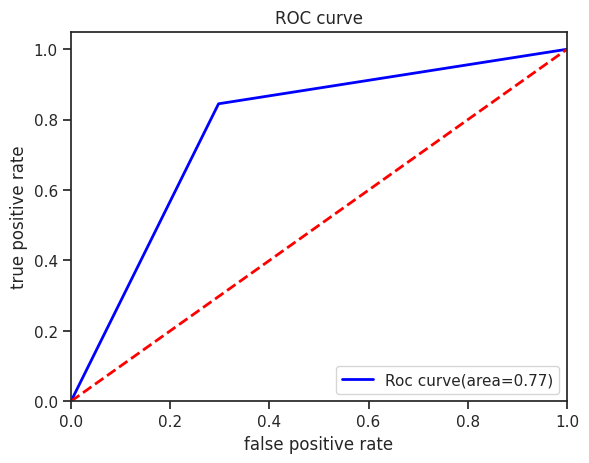

In [ ]:
#plot roc auc
fpr_sv,tpr_sv,treshold=roc_curve(y_test,y_pred_sv)
auc_kn=auc(fpr_sv,tpr_sv)
plt.figure()
lw=2
plt.plot(fpr_sv,tpr_sv,color='blue',lw=lw,label='Roc curve(area=%0.2f)' %auc_kn)
plt.plot([0,1],[0,1],color='red',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()
#lw: line width
#fpr :false positive rate
#tpr :true positive rate

In [ ]:
y_new=sv.predict(scaler.transform([[0,137,40,35,168,43.1,2.288,33]]))
if y_new.item()==1:
  print("The person is Diabetic")
else:
  print('No Diabetes')

The person is Diabetic


**CONCLUSION**

*The proposed approach uses various classification and ensemble learning methods in which KNN, Random Forest, Logistic Regression, Naive Bayes, Decision Tree, AdaBoost, SVC and XGBclassifiers are used. 77 percentage accuracy has been achieved in SVC.*